# Plotting Scripts

## Group-Level Analyses

### Importing dependencies

In [286]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
import StudyII_All_5_note_Sets.paths as StudyII_paths
import StudyI_Pentatonic_vs_Chromatic.paths as StudyI_paths
import Study_Likert.paths as Study_likert_paths
import pandas as pd
import importlib
from Shared_Scripts.stat_funcs import *
import scipy

In [287]:
#Helper function for plot annotation
def annotate(ax, data, x, y):
    slope, intercept, rvalue, pvalue, stderr = scipy.stats.linregress(x=data[x], y=data[y])
    ax.text(.02, .9, f'r2={rvalue ** 2:.2f}, p={pvalue:.2g}', transform=ax.transAxes)

### Loading Data

In [288]:
studyI_GL = pd.read_csv(StudyI_paths.processed_dir + 'group_level_results.csv')
studyII_GL = pd.read_csv(StudyII_paths.processed_dir + 'group_level_results.csv')
study_likert = pd.read_csv(Study_likert_paths.processed_dir + 'set_level_results.csv')

## Actual Analyses

## Trial-Level Analyses

In [1]:
# No need to import if imported at top of page
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
import StudyII_All_5_note_Sets.paths as StudyII_paths
import StudyI_Pentatonic_vs_Chromatic.paths as StudyI_paths
import pandas as pd

### Load the data

In [239]:
studyI_TL = pd.read_pickle(StudyI_paths.processed_dir + 'single_trial_results.pickle')
studyII_TL = pd.read_pickle(StudyII_paths.processed_dir + 'single_trial_results.pickle')

### (optional) Remove decoy trials

In [240]:
studyI_TL = studyII_TL[studyII_TL['has_decoy'] == False]
studyII_TL = studyII_TL[studyII_TL['has_decoy'] == False]

## Analyses

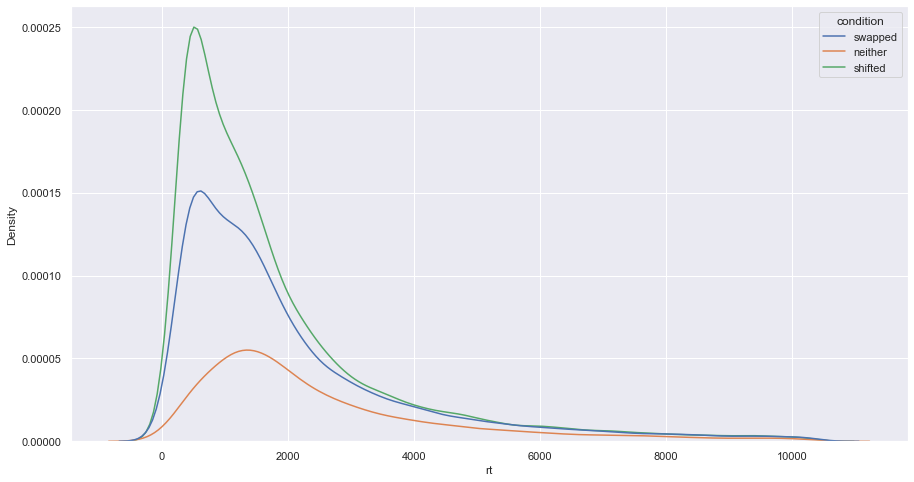

In [268]:
# Study II: Distribution of RT (of Nth percentile)
N = 0.95
temp = studyII_TL[['rt','chose']]
percentile = temp['rt'].quantile(N)
temp = temp[temp['rt']<percentile]
temp = temp.rename(columns={'chose':'condition'})
fig, ax = pyplot.subplots(figsize=(15, 8))
sns.kdeplot(ax=ax, data=temp, x="rt", hue="condition")

plt.show()

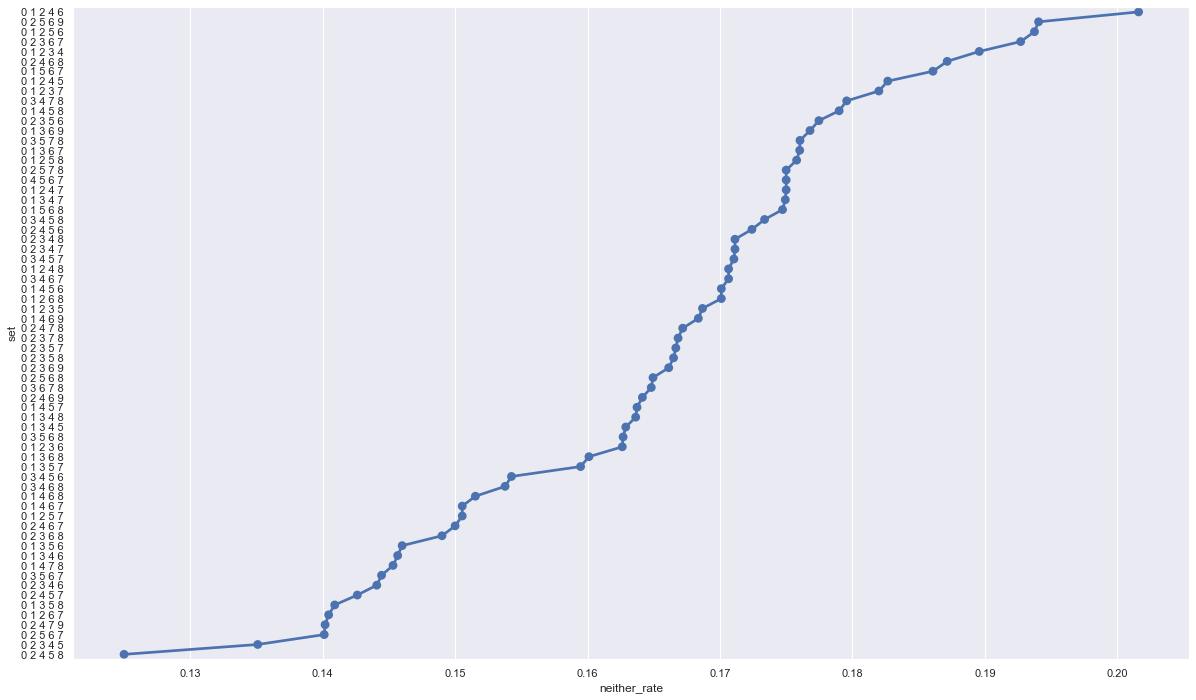

In [250]:
# Study II: Rate of neither across all sets
counts = studyII_TL.groupby('set')['chose'].value_counts().unstack()
counts['total'] = counts['shifted'] + counts['swapped'] + counts['neither']
counts['shifted_rate'] = counts['shifted'] / counts['total']
counts['neither_rate'] = counts['neither'] / counts['total']
counts['not_shifted_rate'] = 1 - counts['shifted_rate']
counts = counts.reset_index().rename(columns={'index':'set'})
plot_order = counts.sort_values(by=["neither_rate"], ascending=False)['set'].values
fig, ax = pyplot.subplots(figsize=(20, 12))
sns.pointplot(ax=ax, y="set", x="neither_rate", data=counts, order=plot_order)
plt.show()

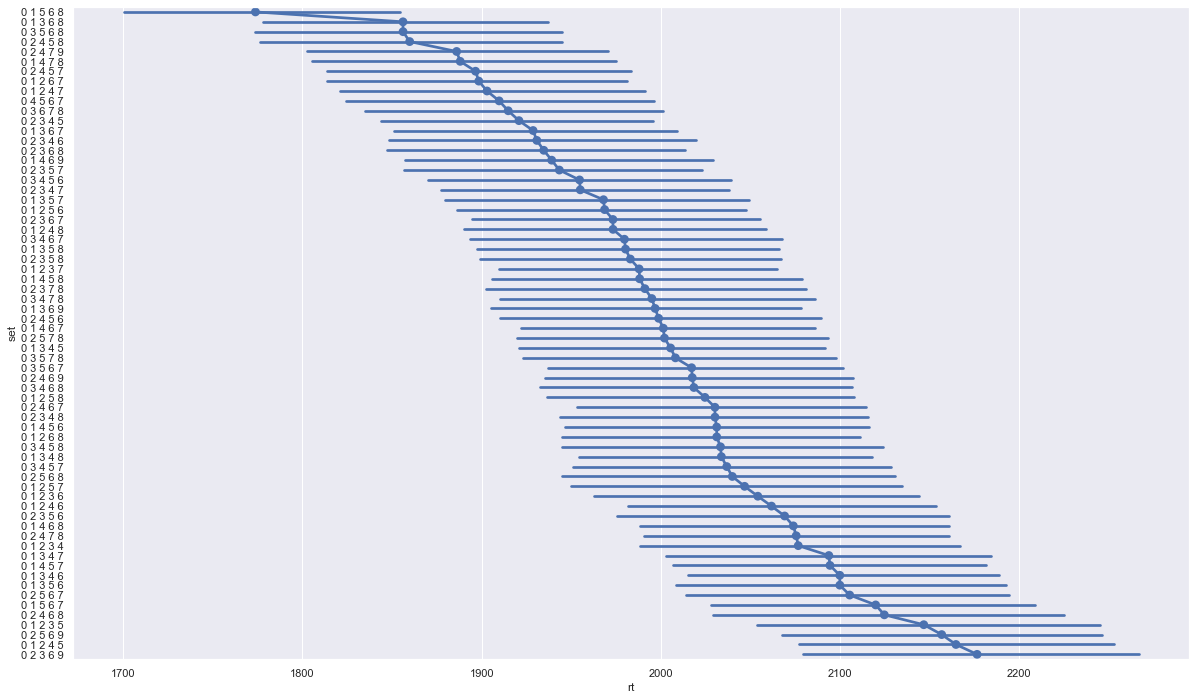

In [267]:
# Study II: RTs across all sets (Nth percentile)
temp = studyII_TL
N = 0.95
percentile = temp['rt'].quantile(N)
temp = temp[temp['rt']<percentile]
mean = temp.groupby('set').mean()['rt'].reset_index().sort_values(by="rt")
plot_order = mean['set'].values
fig, ax = pyplot.subplots(figsize=(20, 12))
sns.pointplot(ax=ax, y="set", x="rt", data=temp, order=plot_order)
plt.show()

### Group-Level Correlations

### Covariance Matrices of chunks

<AxesSubplot:>

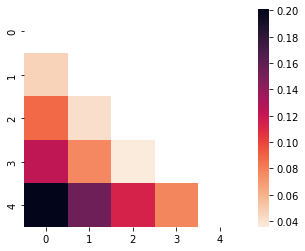

In [197]:
# Matrix of biases (Clusters)
temp = studyII_GL

K=5
chunks = range(K)
CHUNKS_BIAS_DELTA = np.empty((K,K,))
CHUNKS_BIAS_DELTA[:] = np.nan
CHUNKS_BIAS_DELTA = pd.DataFrame(CHUNKS_BIAS_DELTA, index=chunks, columns=chunks)
for chunk1 in chunks:
    for chunk2 in chunks:
        set1_df = temp[temp['K_Means_5']==chunk1]
        set2_df = temp[temp['K_Means_5']==chunk2]
        X = np.mean(set1_df.groupby("set").mean()['rate shifted - rate swapped (NN)'].values)
        Y = np.mean(set2_df.groupby("set").mean()['rate shifted - rate swapped (NN)'].values)
        delta = abs(X-Y)
        CHUNKS_BIAS_DELTA.at[chunk1, chunk2] = delta
CHUNKS_BIAS_DELTA = CHUNKS_BIAS_DELTA.mask(np.triu(np.ones(CHUNKS_BIAS_DELTA.shape, dtype=np.bool_)))
sns.heatmap(CHUNKS_BIAS_DELTA, cmap=sns.color_palette("rocket_r", as_cmap=True), square=True)

<AxesSubplot:>

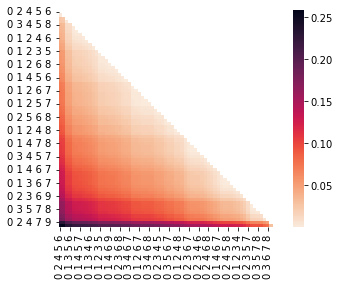

In [189]:
# Matrix of biases (All 66)
temp = studyII_GL

sets = temp.groupby('set').mean().sort_values(by="rate shifted - rate swapped (NN)").index.values

ALL_SETS_BIAS = np.empty((66,66,))
ALL_SETS_BIAS[:] = np.nan
ALL_SETS_BIAS = pd.DataFrame(ALL_SETS_BIAS, index=sets, columns=sets)

for set1_name in sets:
    for set2_name in sets:
        set1_df = temp[temp['set']==set1_name]
        set2_df = temp[temp['set']==set2_name]
        X = np.mean(set1_df.groupby("set").mean()['rate shifted - rate swapped (NN)'].values)
        Y = np.mean(set2_df.groupby("set").mean()['rate shifted - rate swapped (NN)'].values)
        delta = abs(X-Y)
        ALL_SETS_BIAS.at[set1_name, set2_name] = delta

ALL_SETS_BIAS = ALL_SETS_BIAS.mask(np.triu(np.ones(ALL_SETS_BIAS.shape, dtype=np.bool_)))
sns.heatmap(ALL_SETS_BIAS, cmap=sns.color_palette("rocket_r", as_cmap=True), square=True)

<AxesSubplot:>

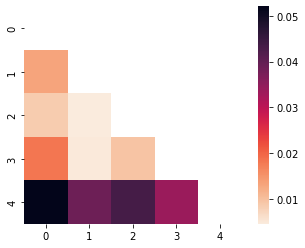

In [198]:
# Matrix of median dissonance
temp = studyII_GL

K=5
chunks = range(K)
CHUNKS_DISSONANCE_DELTA = np.empty((K,K,))
CHUNKS_DISSONANCE_DELTA[:] = np.nan
CHUNKS_DISSONANCE_DELTA = pd.DataFrame(CHUNKS_DISSONANCE_DELTA, index=chunks, columns=chunks)
for chunk1 in chunks:
    for chunk2 in chunks:
        set1_df = temp[temp['K_Means_5']==chunk1]
        set2_df = temp[temp['K_Means_5']==chunk2]
        X = np.mean(set1_df.groupby("set").mean()['Dissonance Median'].values)
        Y = np.mean(set2_df.groupby("set").mean()['Dissonance Median'].values)
        delta = abs(X-Y)
        CHUNKS_DISSONANCE_DELTA.at[chunk1, chunk2] = delta
CHUNKS_DISSONANCE_DELTA = CHUNKS_DISSONANCE_DELTA.mask(np.triu(np.ones(CHUNKS_DISSONANCE_DELTA.shape, dtype=np.bool_)))
sns.heatmap(CHUNKS_DISSONANCE_DELTA, cmap=sns.color_palette("rocket_r", as_cmap=True), square=True)

<AxesSubplot:>

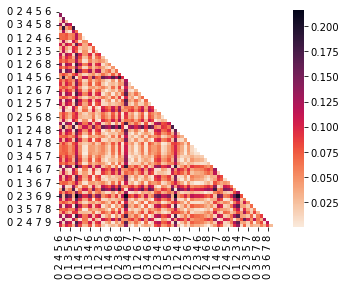

In [190]:
# Matrix of dissonance deltas (All 66)
temp = studyII_GL

sets = temp.groupby('set').mean().sort_values(by="rate shifted - rate swapped (NN)").index.values

ALL_SETS_DISSONANCE = np.empty((66,66,))
ALL_SETS_DISSONANCE[:] = np.nan
ALL_SETS_DISSONANCE = pd.DataFrame(ALL_SETS_DISSONANCE, index=sets, columns=sets)

for set1_name in sets:
    for set2_name in sets:
        set1_df = temp[temp['set']==set1_name]
        set2_df = temp[temp['set']==set2_name]
        X = np.mean(set1_df.groupby("set").mean()['Dissonance Median'].values)
        Y = np.mean(set2_df.groupby("set").mean()['Dissonance Median'].values)
        delta = abs(X-Y)
        ALL_SETS_DISSONANCE.at[set1_name, set2_name] = delta

ALL_SETS_DISSONANCE = ALL_SETS_DISSONANCE.mask(np.triu(np.ones(ALL_SETS_DISSONANCE.shape, dtype=np.bool_)))
sns.heatmap(ALL_SETS_DISSONANCE, cmap=sns.color_palette("rocket_r", as_cmap=True), square=True)

<AxesSubplot:>

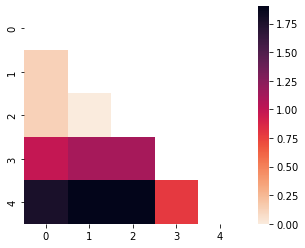

In [199]:
# Matrix of P5s
temp = studyII_GL

K=5
chunks = range(K)
CHUNKS_P5_DELTA = np.empty((K,K,))
CHUNKS_P5_DELTA[:] = np.nan
CHUNKS_P5_DELTA = pd.DataFrame(CHUNKS_P5_DELTA, index=chunks, columns=chunks)
for chunk1 in chunks:
    for chunk2 in chunks:
        set1_df = temp[temp['K_Means_5']==chunk1]
        set2_df = temp[temp['K_Means_5']==chunk2]
        X = np.mean(set1_df.groupby("set").mean()['# IC 5'].values)
        Y = np.mean(set2_df.groupby("set").mean()['# IC 5'].values)
        delta = abs(X-Y)
        CHUNKS_P5_DELTA.at[chunk1, chunk2] = delta
CHUNKS_P5_DELTA = CHUNKS_P5_DELTA.mask(np.triu(np.ones(CHUNKS_P5_DELTA.shape, dtype=np.bool_)))
sns.heatmap(CHUNKS_P5_DELTA, cmap=sns.color_palette("rocket_r", as_cmap=True), square=True)

<AxesSubplot:>

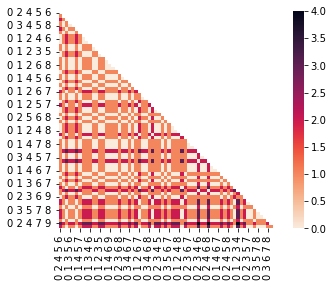

In [194]:
# Matrix of P5 deltas (All 66)
temp = studyII_GL

sets = temp.groupby('set').mean().sort_values(by="rate shifted - rate swapped (NN)").index.values

ALL_SETS_P5 = np.empty((66,66,))
ALL_SETS_P5[:] = np.nan
ALL_SETS_P5 = pd.DataFrame(ALL_SETS_P5, index=sets, columns=sets)

for set1_name in sets:
    for set2_name in sets:
        set1_df = temp[temp['set']==set1_name]
        set2_df = temp[temp['set']==set2_name]
        X = np.mean(set1_df.groupby("set").mean()['# IC 5'].values)
        Y = np.mean(set2_df.groupby("set").mean()['# IC 5'].values)
        delta = abs(X-Y)
        ALL_SETS_P5.at[set1_name, set2_name] = delta

ALL_SETS_P5 = ALL_SETS_P5.mask(np.triu(np.ones(ALL_SETS_P5.shape, dtype=np.bool_)))
sns.heatmap(ALL_SETS_P5, cmap=sns.color_palette("rocket_r", as_cmap=True), square=True)

9999 of 10000

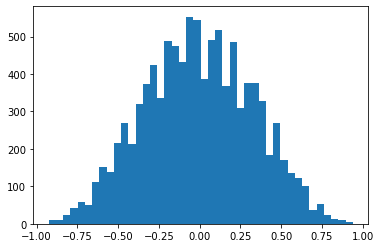

p = 0.0121
obs_stat = 0.7575757575757575
9999 of 10000

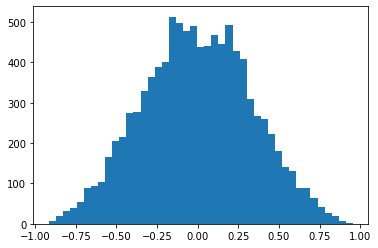

p = 0.0875
obs_stat = 0.5688312786486196


In [200]:
# Cluster matrix comparison

bias = CHUNKS_BIAS_DELTA.to_numpy().flatten()
bias = bias[~np.isnan(bias)]


dissonance = CHUNKS_DISSONANCE_DELTA.to_numpy().flatten()
dissonance = dissonance[~np.isnan(dissonance)]

P5 = CHUNKS_P5_DELTA.to_numpy().flatten()
P5 = P5[~np.isnan(P5)]

bias_dissonance_corr = 1-st.permtest_corr(bias,dissonance,10000)[0]
bias_P5_corr = 1-st.permtest_corr(bias,P5,10000)[0]

9999 of 10000

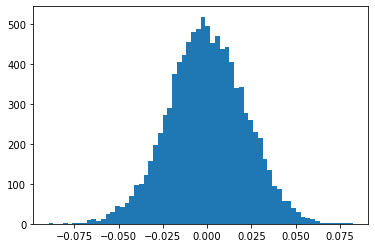

p = 0.1949
obs_stat = 0.028099227385125485
9999 of 10000

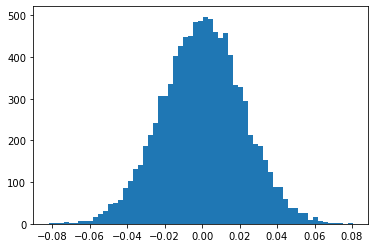

p = 0.0
obs_stat = 0.15718525501256073


In [196]:
# All sets matrix comparison

bias = ALL_SETS_BIAS.to_numpy().flatten()
bias = bias[~np.isnan(bias)]


dissonance = ALL_SETS_DISSONANCE.to_numpy().flatten()
dissonance = dissonance[~np.isnan(dissonance)]

P5 = ALL_SETS_P5.to_numpy().flatten()
P5 = P5[~np.isnan(P5)]

bias_dissonance_corr = 1-st.permtest_corr(bias,dissonance,10000)[0]
bias_P5_corr = 1-st.permtest_corr(bias,P5,10000)[0]

## Statistics


In [12]:
# Study II: Get correlation of every half of subjects on rate_shifted

temp = studyII_GL
temp = studyII_GL[['subject', 'rate shifted - rate swapped (NN)', 'set', 'section']]
temp1 = temp.groupby('set').mean().sort_values(by='rate shifted - rate swapped (NN)')
worst = [*temp1.index.values[0:10]]
best = [*temp1.index.values[-10:]]
all = temp1.index.values
sets = worst + best
temp = temp[temp['set'].isin(sets)]
how_many = temp.groupby("set").first().shape[0]
X = temp[temp['section'].isin([0, 1, 2])].groupby('set')[
    'rate shifted - rate swapped (NN)'].mean().sort_index().to_frame().reset_index().rename(
    columns={'rate shifted - rate swapped (NN)': 'X'})
Y = temp[temp['section'].isin([3, 4, 5])].groupby('set')[
    'rate shifted - rate swapped (NN)'].mean().sort_index().to_frame().reset_index().rename(
    columns={'rate shifted - rate swapped (NN)': 'Y'})
both = pd.merge(X, Y, on='set')
R, P = stats.pearsonr(both['X'], both['Y'])
print("R={}, P={}".format(R, P))

R=0.5226984004955406, P=0.01805142634845766


In [192]:
importlib.reload(st)

<module 'Shared_Scripts.stat_funcs' from 'C:\\Users\\Michael\\PycharmProjects\\Scale_Studies\\Shared_Scripts\\stat_funcs.py'>

9999 of 10000

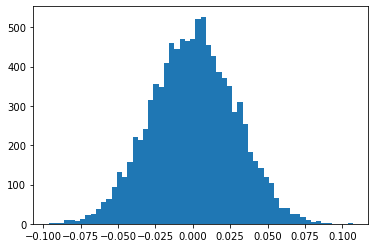

p = 0.1249
obs_stat = 0.04329558767217085


In [24]:

temp = studyII_GL

set = "0 2 4 5 6"

temp2 = temp[temp['set']==set]
X = temp2['rate_NN_shifted'].values
Y = temp2['rate_NN_swapped'].values
obs_stat, p = st.perm_bias_paired(X,Y,10000)

In [186]:
temp = studyII_GL

sets = temp.groupby('set').mean().sort_values(by="rate shifted - rate swapped (NN)").index.values

ALL_SETS_P = np.empty((66,66,))
ALL_SETS_P[:] = np.nan
ALL_SETS_P = pd.DataFrame(ALL_SETS_P, index=sets, columns=sets)

ALL_SETS_OBS = np.empty((66,66,))
ALL_SETS_OBS[:] = np.nan
ALL_SETS_OBS = pd.DataFrame(ALL_SETS_OBS, index=sets, columns=sets)

total_tests = 66*66
current_test = 1

for set1_name in sets:
    for set2_name in sets:
        print("\rcompleted {}%".format(round((current_test/total_tests)*100)),end='')
        set1_df = temp[temp['set']==set1_name]
        set2_df = temp[temp['set']==set2_name]
        X = set1_df['rate shifted - rate swapped (NN)'].values
        Y = set2_df['rate shifted - rate swapped (NN)'].values
        obs_stat, p = st.perm_bias_unpaired(X,Y,10000,loud=False)
        ALL_SETS_OBS.at[set1_name, set2_name] = obs_stat
        ALL_SETS_P.at[set1_name, set2_name] = p
        current_test += 1

ALL_SETS_P.to_csv(StudyII_paths.processed_dir + 'all_sets_p.csv')
ALL_SETS_OBS.to_csv(StudyII_paths.processed_dir + 'all_sets_obs.csv')

completed 100%

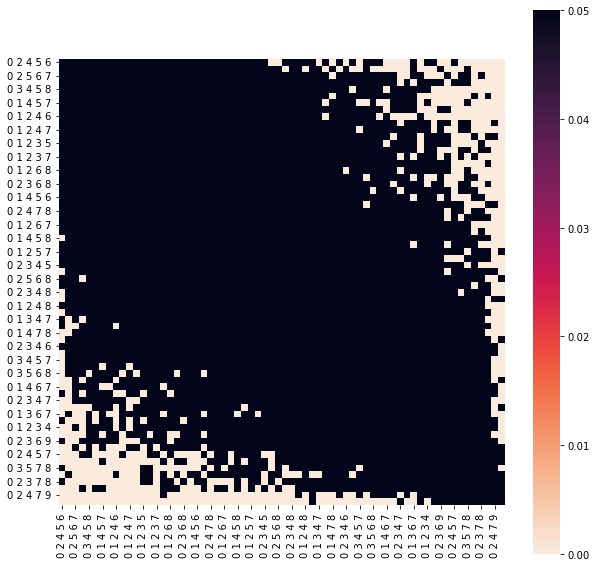

In [158]:
fig, ax = pyplot.subplots(figsize=(10, 10))
sns.heatmap(ALL_SETS_P, cmap=sns.color_palette("rocket_r", as_cmap=True), ax=ax,vmin=0, vmax=0.05, square=True)
plt.savefig(StudyII_paths.plots_dir + "set_p_matrix.svg")

In [118]:
temp = studyII_GL

N=4

sets = temp.groupby('set').mean().sort_values(by="rate shifted - rate swapped (NN)").index.values
chunk_names = np.array_split(sets,N)

column_names = ["chunk {}".format(i+1) for i,_ in enumerate(chunk_names)]

ALL_CHUNKS_P = np.empty((N,N,))
ALL_CHUNKS_P[:] = np.nan
ALL_CHUNKS_P = pd.DataFrame(ALL_CHUNKS_P, index=column_names, columns=column_names)

ALL_CHUNKS_OBS = np.empty((N,N,))
ALL_CHUNKS_OBS[:] = np.nan
ALL_CHUNKS_OBS = pd.DataFrame(ALL_CHUNKS_OBS, index=column_names, columns=column_names)

total_tests = N*N
current_test = 1

for i, set1_names in enumerate(chunk_names):
    for j, set2_names in enumerate(chunk_names):
        print("\rcompleted {}%".format(round((current_test/total_tests)*100)),end='')
        set1_df = temp[temp['set'].isin(set1_names)]
        set2_df = temp[temp['set'].isin(set2_names)]
        X = set1_df['rate shifted - rate swapped (NN)'].values
        Y = set2_df['rate shifted - rate swapped (NN)'].values
        obs_stat, p = st.perm_bias_unpaired(X,Y,10000,loud=False)
        ALL_CHUNKS_OBS.at["chunk {}".format(i+1), "chunk {}".format(j+1)] = obs_stat
        ALL_CHUNKS_P.at["chunk {}".format(i+1), "chunk {}".format(j+1)] = p
        current_test += 1


ALL_CHUNKS_P.to_csv(StudyII_paths.processed_dir + '{}_chunks_p.csv'.format(N))
ALL_CHUNKS_OBS.to_csv(StudyII_paths.processed_dir + '{}_chunks_obs.csv'.format(N))

completed 100%

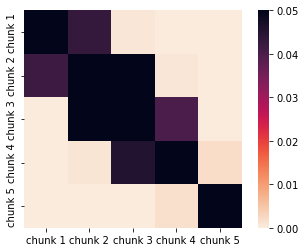

In [114]:
fig, ax = pyplot.subplots()
sns.heatmap(ALL_CHUNKS_P, cmap=sns.color_palette("rocket_r", as_cmap=True), square=True, ax=ax,vmin=0, vmax=0.05)
plt.savefig(StudyII_paths.plots_dir + "5_chunk_p_matrix.svg")